# Projections de la consommation culturelle patrimoniale

Auteur : [Maximo Rose](https://maximorose.eu/)

Licence : [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

-----------------------------------------------------------

## Introduction
On part de la fin de l'enquête du DEPS pour estimer la part de consommation patrimoniale à venir.

In [1]:
import pandas as pd
filename = 'Univers_historique.csv'
dt_univers = pd.read_csv(filename)

<AxesSubplot:title={'center':'Evolution des univers culturels'}, xlabel='Année'>

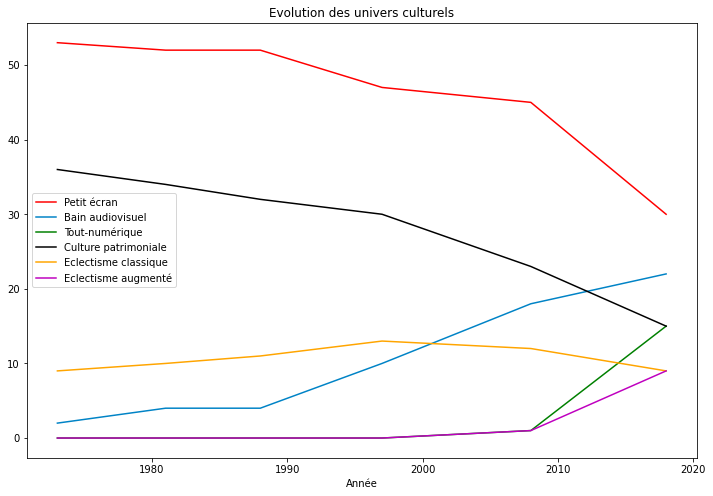

In [2]:
import matplotlib.pyplot as plt

petit_ecran = dt_univers[dt_univers['Univers'] == 'Petit écran']
bain_audiovisuel = dt_univers[dt_univers['Univers'] == 'Bain audiovisuel']
tout_numerique = dt_univers[dt_univers['Univers'] == 'Tout-numérique']
culture_patrimoniale = dt_univers[dt_univers['Univers'] == 'Culture patrimoniale']
ecclectisme_classique = dt_univers[dt_univers['Univers'] == 'Eclectisme classique']
ecclectisme_augmente = dt_univers[dt_univers['Univers'] == 'Eclectisme augmenté']

fig , axs = plt.subplots(figsize=(12,8))
# Titre
plt.title("Evolution des univers culturels")
petit_ecran.plot(x='Année', y='Part', ax = axs, color = 'red', label = 'Petit écran' )
bain_audiovisuel.plot(x='Année', y='Part', ax = axs, color = '#0083c6', label = 'Bain audiovisuel')
tout_numerique.plot(x='Année', y='Part', ax = axs, color = 'green', label = 'Tout-numérique')
culture_patrimoniale.plot(x='Année', y='Part', ax = axs, color = 'black', label = 'Culture patrimoniale')
ecclectisme_classique.plot(x='Année', y='Part', ax = axs, color = 'orange', label = 'Eclectisme classique')
ecclectisme_augmente.plot(x='Année', y='Part', ax = axs, color = 'm', label = 'Eclectisme augmenté')

# Approche simpliste

## Etat des lieux

Textuellement le rapport positionne les visiteurs d'expositions muséales dans les univers : 
- Culture patrimoniale
- Eclectisme classique
- Eclectisme augmenté

Sans considérer la part des personnes au sein de ces univers qui déclare visiter des musées (seul 73% des membres de l'éclectisme augmenté déclarent avoir visité une exposition en 2018, contre 90% des membres de l'éclectisme classique. Ainsi l'accroissement de l'univers de l'éclectisme augmenté pourrait ne pas forcément compensé la perte de l'éclectisme classique).
On peut considérer comme une approximation très positive de simplement sommer les populations de ces univers pour évaluer la part de public à laquelle les insitutions muséales ont pu prétendre au cours des 5 dernières décennies.

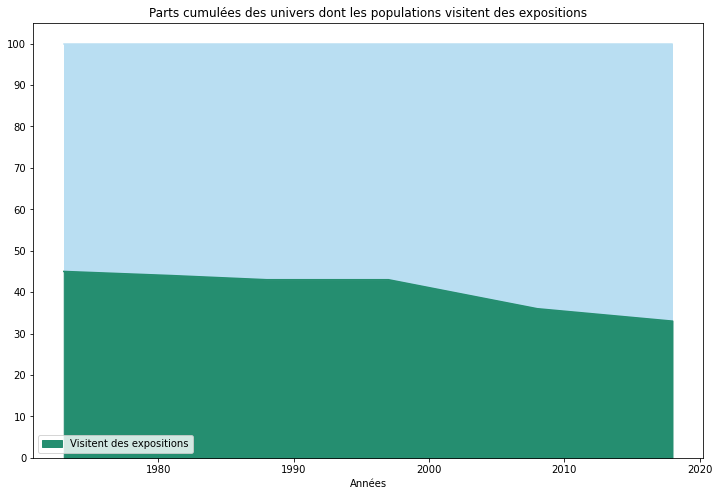

In [13]:
import numpy as np

univers_visiteurs_de_musee = culture_patrimoniale.append(ecclectisme_classique).append(ecclectisme_augmente)
univers_non_visiteurs_de_musee = petit_ecran.append(bain_audiovisuel).append(tout_numerique)
annees = [1973, 1981, 1988, 1997, 2008, 2018]


somme_visiteur_de_musee_par_annee = []
somme_non_visiteur_de_musee_par_annee = []
for i in range(len(annees)) :
    subdtf_v = univers_visiteurs_de_musee[univers_visiteurs_de_musee['Année'] == annees[i]]
    subdtf_nv = univers_non_visiteurs_de_musee[univers_non_visiteurs_de_musee['Année'] == annees[i]]
    somme_visiteur_de_musee = subdtf_v['Part'].sum()
    somme_non_visiteur_de_musee = subdtf_nv['Part'].sum()
    somme_visiteur_de_musee_par_annee.append(somme_visiteur_de_musee)
    somme_non_visiteur_de_musee_par_annee.append(somme_non_visiteur_de_musee)

d_visiteurs = {'Années':annees,'Parts cumulées':somme_visiteur_de_musee_par_annee}
df_visiteurs = pd.DataFrame(d_visiteurs)

d_non_visiteurs = {'Années':annees,'Parts cumulées':[100, 100, 100, 100, 100, 100]}
df_non_visiteurs = pd.DataFrame(d_non_visiteurs)


fig , axs = plt.subplots(figsize=(12,8))
plt.title('Parts cumulées des univers dont les populations visitent des expositions')
df_non_visiteurs.plot.area(x='Années', y='Parts cumulées', ax = axs, color = '#b9def2', legend = False)
df_visiteurs.plot.area(x='Années', y='Parts cumulées', ax = axs, color = '#258e70', label = 'Visitent des expositions')
plt.yticks(np.arange(110, step=10))
plt.show()
#ax.set_yticks(np.arange(0, 100)

In [4]:
print("Part de visiteurs potentiels de musée en 1973 : " + str(somme_visiteur_de_musee_par_annee[0])+'%')
print("Part de visiteurs potentiels de musée en 2018 : " + str(somme_visiteur_de_musee_par_annee[-1])+'%')

Part de visiteurs potentiels de musée en 1973 : 45%
Part de visiteurs potentiels de musée en 2018 : 33%


### Bilan

La part de public potentiellement amené à visiter une exposition décroît au fil du temps. Elle a perdu 12 points en 50 ans, soit une baisse de plus d'1/4.

La décroissance la plus forte a eu lieu à l'approche des années 2000.

## Projection

Considérons maintenant les tendances à la croissance ou à la décroissance des univers pour estimer des projections à venir de cette part.

Imaginons la perspective où l'évolution de 2008 à 2018 largement impactée par le développement de l'industrie numérique, du big data, donc des algortihmes prédictifs et de big brother, perdure : les univers en croissance continuent de croitre aux mêmes rythme, et ceux en décroissance suivent leur pente.

In [5]:
Part2008_petit_ecran = petit_ecran[petit_ecran['Année'] == 2008]['Part'].values[0]
Part2018_petit_ecran = petit_ecran[petit_ecran['Année'] == 2018]['Part'].values[0]
variation_petit_ecran = (Part2018_petit_ecran - Part2008_petit_ecran)/Part2008_petit_ecran
projection_2028_petit_ecran = Part2018_petit_ecran + variation_petit_ecran*Part2018_petit_ecran
print ("Petit écran en 2008 : " + str(Part2008_petit_ecran))
print ("Petit écran en 2018 : " + str(Part2018_petit_ecran))
print("Petit écran en 2028 : " + str(projection_2028_petit_ecran))
print()


Part2008_bain_audiovisuel = bain_audiovisuel[bain_audiovisuel['Année'] == 2008]['Part'].values[0]
Part2018_bain_audiovisuel = bain_audiovisuel[bain_audiovisuel['Année'] == 2018]['Part'].values[0]
variation_bain_audiovisuel = (Part2018_bain_audiovisuel - Part2008_bain_audiovisuel)/Part2008_bain_audiovisuel
projection_2028_bain_audiovisuel = Part2018_bain_audiovisuel + variation_bain_audiovisuel*Part2018_bain_audiovisuel
print ("Bain audiovisuel en 2008 : " + str(Part2008_bain_audiovisuel))
print ("Bain audiovisuel en 2018 : " + str(Part2018_bain_audiovisuel))
print("Bain audiovisuel en 2028 : " + str(projection_2028_bain_audiovisuel))
print()

Part2008_tout_numerique = tout_numerique[tout_numerique['Année'] == 2008]['Part'].values[0]
Part2018_tout_numerique = tout_numerique[tout_numerique['Année'] == 2018]['Part'].values[0]
variation_tout_numerique = (Part2018_tout_numerique - Part2008_tout_numerique)/Part2008_tout_numerique
projection_2028_tout_numerique = Part2018_tout_numerique + variation_tout_numerique*Part2018_tout_numerique
print ("Tout numérique en 2008 : " + str(Part2008_tout_numerique))
print ("Tout numérique en 2018 : " + str(Part2018_tout_numerique))
print("Tout numérique en 2028 : " + str(projection_2028_tout_numerique))
print()


Part2008_culture_patrimoniale = culture_patrimoniale[culture_patrimoniale['Année'] == 2008]['Part'].values[0]
Part2018_culture_patrimoniale = culture_patrimoniale[culture_patrimoniale['Année'] == 2018]['Part'].values[0]
variation_culture_patrimoniale = (Part2018_culture_patrimoniale - Part2008_culture_patrimoniale)/Part2008_culture_patrimoniale
projection_2028_culture_patrimoniale = Part2018_culture_patrimoniale + variation_culture_patrimoniale*Part2018_culture_patrimoniale
print ("Culture Patrimoniale en 2008 : " + str(Part2008_culture_patrimoniale))
print ("Culture Patrimoniale en 2018 : " + str(Part2018_culture_patrimoniale))
print("Culture Patrimoniale en 2028 : " + str(projection_2028_culture_patrimoniale))
print()

Part2008_ecclectisme_classique = ecclectisme_classique[ecclectisme_classique['Année'] == 2008]['Part'].values[0]
Part2018_ecclectisme_classique = ecclectisme_classique[ecclectisme_classique['Année'] == 2018]['Part'].values[0]
variation_ecclectisme_classique = (Part2018_ecclectisme_classique - Part2008_ecclectisme_classique)/Part2008_ecclectisme_classique
projection_2028_ecclectisme_classique = Part2018_ecclectisme_classique + variation_ecclectisme_classique*Part2018_ecclectisme_classique
print ("Eclectisme classique en 2008 : " + str(Part2008_ecclectisme_classique))
print ("Eclectisme classique en 2018 : " + str(Part2018_ecclectisme_classique))
print("Eclectisme classique en 2028 : " + str(projection_2028_ecclectisme_classique))
print()


Part2008_ecclectisme_augmente = ecclectisme_augmente[ecclectisme_augmente['Année'] == 2008]['Part'].values[0]
Part2018_ecclectisme_augmente = ecclectisme_augmente[ecclectisme_augmente['Année'] == 2018]['Part'].values[0]
variation_ecclectisme_augmente = (Part2018_ecclectisme_augmente - Part2008_ecclectisme_augmente)/Part2008_ecclectisme_augmente
projection_2028_ecclectisme_augmente = Part2018_ecclectisme_augmente + variation_ecclectisme_augmente*Part2018_ecclectisme_augmente
print ("Eclectisme augmenté en 2008 : " + str(Part2008_ecclectisme_augmente))
print ("Eclectisme augmenté en 2018 : " + str(Part2018_ecclectisme_augmente))
print("Eclectisme augmenté en 2028 : " + str(projection_2028_ecclectisme_augmente))
print()

Petit écran en 2008 : 45
Petit écran en 2018 : 30
Petit écran en 2028 : 20.0

Bain audiovisuel en 2008 : 18
Bain audiovisuel en 2018 : 22
Bain audiovisuel en 2028 : 26.88888888888889

Tout numérique en 2008 : 1
Tout numérique en 2018 : 15
Tout numérique en 2028 : 225.0

Culture Patrimoniale en 2008 : 23
Culture Patrimoniale en 2018 : 15
Culture Patrimoniale en 2028 : 9.782608695652174

Eclectisme classique en 2008 : 12
Eclectisme classique en 2018 : 9
Eclectisme classique en 2028 : 6.75

Eclectisme augmenté en 2008 : 1
Eclectisme augmenté en 2018 : 9
Eclectisme augmenté en 2028 : 81.0



Deux valeurs projetées posent problèmes : celle du tout numérique et celle de l'éclectisme augmenté. Leur croissance a été si forte entre 2008 et 2018 qu'il est difficile d'en projeter une valeur réalitée.

Cependant, la croissance de l'univers "tout-numérique" est 1.6 fois plus grande que celle de l'éclectisme augmenté. Si ce rapport était maintenu et que ces deux univers se partageaint la part de public restante, une fois oter la part des autres univers à la totalité, on pourrait imaginer

In [6]:
print(str(Part2018_tout_numerique/Part2018_ecclectisme_augmente))

1.6666666666666667


In [7]:
reste = 100 - (projection_2028_petit_ecran + projection_2028_bain_audiovisuel + projection_2028_culture_patrimoniale + projection_2028_ecclectisme_classique)
Part2028_ecclectisme_augmente = reste / (1 + 1.6)
print(Part2028_ecclectisme_augmente)
Part2028_tout_numerique = reste - Part2028_ecclectisme_augmente
print(Part2028_tout_numerique)

14.068654775176515
22.509847640282427


__N.B :__ Selon moi ce sont de sprojections plutot positives. Je pense qu'il est plus facile de se faire happer par le tout numérique car c'ets une pratique qui nécessite plus de passivité, alors que l'eclectisme augmenté nécessite plus de pratiques actives.

<AxesSubplot:title={'center':'Evolution des univers culturels'}, xlabel='Année'>

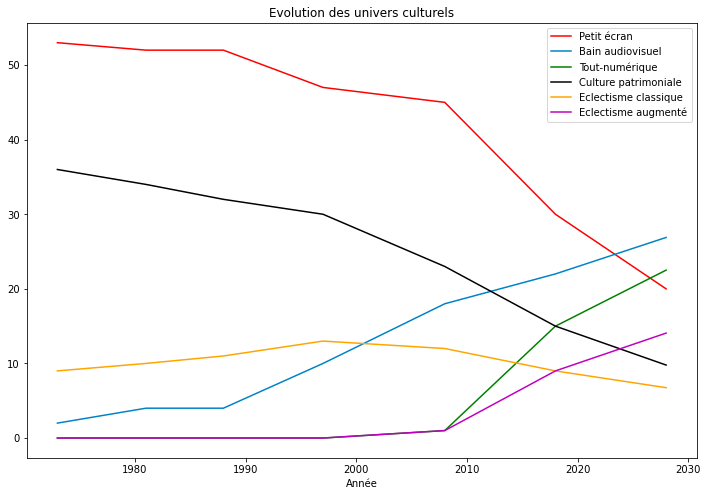

In [8]:
dpe = {'Univers' : ["Petit écran"], 'Année': [2028], 'Part' : [projection_2028_petit_ecran]}
df_pe = pd.DataFrame(dpe)
petit_ecran = petit_ecran.append(df_pe)

dba = {'Univers' : ["Bain audiovisuel"], 'Année': [2028], 'Part' : [projection_2028_bain_audiovisuel]}
df_ba = pd.DataFrame(dba)
bain_audiovisuel = bain_audiovisuel.append(df_ba)

dtn = {'Univers' : ["Tout-numérique"], 'Année': [2028], 'Part' : [Part2028_tout_numerique]}
df_tn = pd.DataFrame(dtn)
tout_numerique = tout_numerique.append(df_tn)

dcp = {'Univers' : ["Culture patrimoniale"], 'Année': [2028], 'Part' : [projection_2028_culture_patrimoniale]}
df_cp = pd.DataFrame(dcp)
culture_patrimoniale = culture_patrimoniale.append(df_cp)

dec = {'Univers' : ["Eclectisme classique"], 'Année': [2028], 'Part' : [projection_2028_ecclectisme_classique]}
df_ec = pd.DataFrame(dec)
ecclectisme_classique = ecclectisme_classique.append(df_ec)

dea = {'Univers' : ["Eclectisme augmenté"], 'Année': [2028], 'Part' : [Part2028_ecclectisme_augmente]}
df_ea = pd.DataFrame(dea)
ecclectisme_augmente = ecclectisme_augmente.append(df_ea)

fig , axs = plt.subplots(figsize=(12,8))
# Titre
plt.title("Evolution des univers culturels")
petit_ecran.plot(x='Année', y='Part', ax = axs, color = 'red', label = 'Petit écran' )
bain_audiovisuel.plot(x='Année', y='Part', ax = axs, color = '#0083c6', label = 'Bain audiovisuel')
tout_numerique.plot(x='Année', y='Part', ax = axs, color = 'green', label = 'Tout-numérique')
culture_patrimoniale.plot(x='Année', y='Part', ax = axs, color = 'black', label = 'Culture patrimoniale')
ecclectisme_classique.plot(x='Année', y='Part', ax = axs, color = 'orange', label = 'Eclectisme classique')
ecclectisme_augmente.plot(x='Année', y='Part', ax = axs, color = 'm', label = 'Eclectisme augmenté')

In [9]:
print("Part de visiteur potentiels des musées en 2028 : " +  str(int(projection_2028_ecclectisme_classique+projection_2028_culture_patrimoniale+Part2028_ecclectisme_augmente))+"% \nContre "+str(somme_visiteur_de_musee_par_annee[-1])+'% en 2018. La baisse continue.')

Part de visiteur potentiels des musées en 2028 : 30% 
Contre 33% en 2018. La baisse continue.


# Bilan :

Si rien arrive pour enrayer ce phénomène, la culture patrimoniale risque de perdre encore des publics potentiels, donc des revenus associés.

L'univers "Culture Patrimoniale" est d'ailleurs voué" à disparaître selon l'enquête du DEPS, sa population, en vieillissant, adhère finalement à un autre univers.

Il est capital de trouver un moyen de capter des publics éloignés